In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import pandas as pd
import time

# Celula Automata para um sistema de porosidade = Percolation

In [2]:
#%%time
def rocha(N, p=0):
    #Condição que permita N ser apenas ímpar*
    if N % 2 == 0: N = N+1
    #Rocha será a matrix N por N
    rocha, m = np.zeros((N,N))    ,    int((N-1)/2)
    
    # Monta a matriz conforme a probabilidade escolhida. Sendo quanto mais poros mais perto de p=1
    for i in range(N):
        for j in range(N):
            if random.random() >= p: rocha[i,j] = 1
            else: rocha[i,j] = 0
    #--------------------------------------#
    
    #Condição inicial de fluído no meio
    rocha[m,m] = 2
    return rocha 
rocha(11, p=0)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

O objetivo da interação é salvar os valores das posições que eram $0$ e viraram $2$. No próximo while o for voltará exatamente naquelas posições. Fazendo todos os caminhos possíveis de uma só vez!

In [3]:
def Percolation(N, p):
    ini = time.time()
    rock, m = rocha(N, p), [[int((N-1)/2),int((N-1)/2)]]
    m_atual = []
    wall = False #Se percolar a função retorna True
    contador= 0  #Condição de parada do while caso não percole

    while contador < N**2:
        for i in range(len(m)):
            if rock[m[i][0]-1,m[i][1]] == 0:
                rock[m[i][0]-1,m[i][1]] = 2
                m_atual.append([m[i][0]-1,m[i][1]])
                
            if rock[m[i][0],m[i][1]+1] == 0:
                rock[m[i][0],m[i][1]+1] = 2 
                m_atual.append([m[i][0],m[i][1]+1])
                
            if rock[m[i][0]+1,m[i][1]] == 0:
                rock[m[i][0]+1,m[i][1]] = 2
                m_atual.append([m[i][0]+1,m[i][1]])
                
            if rock[m[i][0],m[i][1]-1] == 0:
                rock[m[i][0],m[i][1]-1] = 2
                m_atual.append([m[i][0],m[i][1]-1]) 
            #Condição de parada. Encontrar 2 nas extremidades
            if any(rock[0,:] == 2) or any(rock[N-1,:] == 2) or any(rock[:,0] == 2) or any(rock[:,N-1] == 2):
                contador = N**2 + 1 
                wall = True
        if len(m_atual) == 0: #Parar para o caso de não percolar
            contador = N**2+2

            
        for i in range(len(m_atual)):
            m.append(m_atual[i])
        
        m_atual = []
        contador += 1
    return rock, wall 

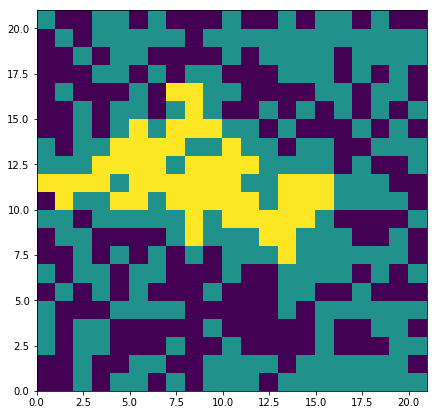

0.1336197853088379

In [4]:
#Gráfico ilustrativo
def Plot(N, p): 
    ini = time.time()
    plt.figure(figsize=(7,7)) 
    plt.pcolor(Percolation(N,p)[0])
    plt.show()
    fim = time.time()
    return fim-ini
Plot(21, 0.5)

In [8]:

def probabilidade(N,Tamanho_de_p, repeticao=100):
    ini = time.time()
    p = np.linspace(0,1,Tamanho_de_p)
    f = np.zeros(len(p))
    contador = 0
    
    # i,j = Faz um 'for' para cada valor de porosidade
    #Um for com x (ex: repeticao=100) repetições para cada 'porosidade' dando a probabilidade de percolar para cada porosidade. 
    #Salva em f.
    for i, j in enumerate(p):
        for k in range(repeticao):
            if Percolation(N, j)[1] == True:
                contador += 1
        f[i] = contador/repeticao
        contador = 0

    fim = time.time()
    if fim-ini > 60: 
        tempo = (fim-ini)/60
        print('minutos: ', tempo)
    else: 
        tempo = fim-ini
        print('segundos: ', tempo)
    return f, p

In [9]:
Prob = probabilidade(21,101, repeticao=100)

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 22.9 µs
segundos:  31.879514694213867


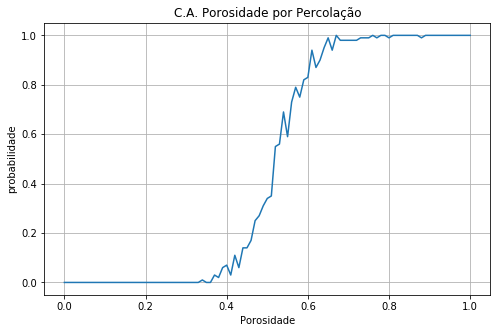

In [13]:
def PlotProb(): 
    plt.figure(figsize=(8,5)) 
    plt.plot(Prob[1],Prob[0])
    plt.xlabel('Porosidade')
    plt.ylabel('probabilidade')
    plt.title("C.A. Porosidade por Percolação")
    plt.grid()
    plt.show()
    return 
PlotProb()

## Plot da Pobabilidade de percolar por porosidade

In [12]:
def ProbabilidadeGrafico(N,Tamanho_de_p, repeticao=100):
    ini = time.time()
    p = np.linspace(0,1,Tamanho_de_p)
    f = np.zeros(len(p))
    contador = 0
    
    for i, j in enumerate(p): 
        for k in range(repeticao):  
            if Percolation(N, j)[1] == True:
                contador += 1
        f[i] = contador/repeticao
        contador = 0
        
    plt.figure(figsize=(8,6)) 
    plt.plot(p,f)
    plt.xlabel('Porosidade')
    plt.ylabel('probabilidade')
    plt.title("C.A. Porosidade por Percolação")
    plt.grid()
    plt.show()
    
    fim = time.time()
    if fim-ini > 60: 
        tempo = (fim-ini)/60
        print('minutos: ', tempo)
    else: 
        tempo = fim-ini
        print('segundos: ', tempo)
    return

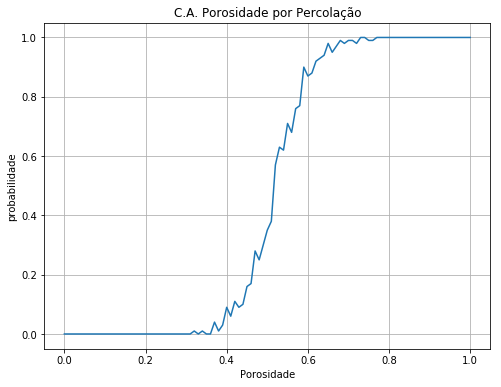

segundos:  29.243592977523804


In [414]:
ProbabilidadeGrafico(N=21,Tamanho_de_p=101, repeticao=100)

# Gráfico da média das probabilidade

In [11]:
def ProbabilidadeGrafico(N,Tamanho_de_p, accuracy, repeticao=100):
    ini = time.time()
    p = np.linspace(0,1,Tamanho_de_p)
    f = np.zeros((accuracy, len(p) )) 
    contador = 0.00
    
    for a in range(accuracy):
        for i, j in enumerate(p): 
            for k in range(repeticao):  
                if Percolation(N, j)[1] == True:
                    contador += 1
            f[a,i] = contador/repeticao
            contador = 0
        
    DF = pd.DataFrame(f)

    fim = time.time()
    if fim-ini > 60: 
        tempo = (fim-ini)/60
        print(tempo, ' minutos')
    else: 
        tempo = fim-ini
        print(tempo, ' segundos')
    plt.figure(figsize=(8,6)) 
    plt.plot(p,DF.mean())
    plt.xlabel('Porosidade')
    plt.ylabel('probabilidade')
    plt.title("C.A. Porosidade por Percolação")
    plt.grid()
    plt.show()
    return DF

segundos:  51.223952770233154


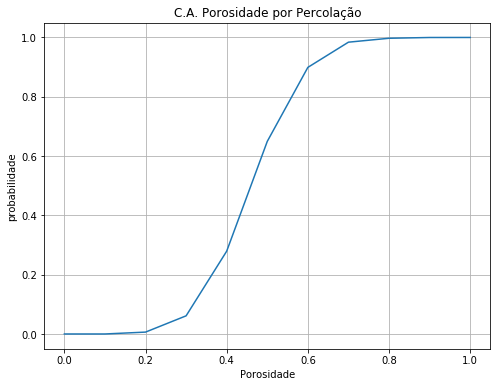

In [501]:
DF = ProbabilidadeGrafico(N=11,Tamanho_de_p=11, accuracy=100,  repeticao=100)

minutos:  5.777354419231415


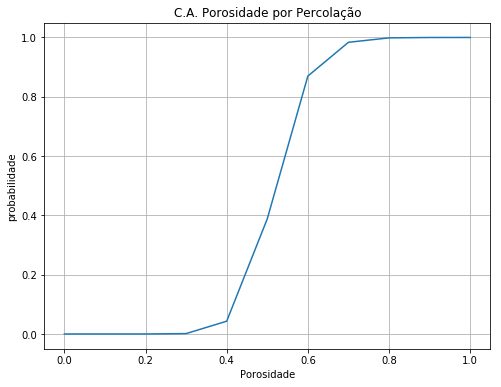

In [502]:
DF = ProbabilidadeGrafico(N=21,Tamanho_de_p=11, accuracy=100,  repeticao=100)

minutos:  5.102675632635752


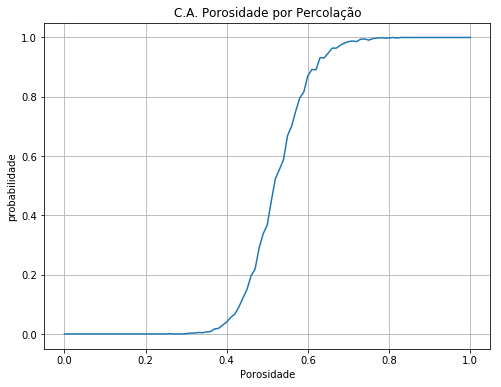

In [504]:
DF = ProbabilidadeGrafico(N=21,Tamanho_de_p=101, accuracy=10,  repeticao=100)

minutos:  10.203218746185303


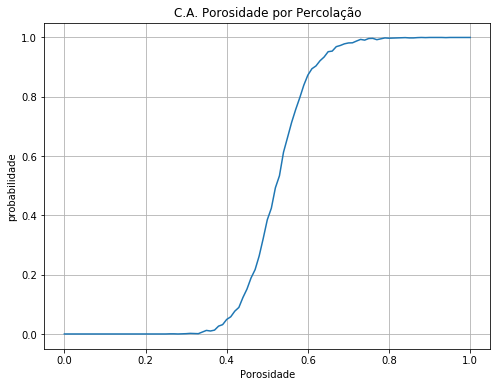

In [505]:
DF = ProbabilidadeGrafico(N=21,Tamanho_de_p=101, accuracy=20,  repeticao=100)

## Função com média das probolidades

In [14]:
def ProbabilidadeGraficoN(N,Tamanho_de_p, accuracy, repeticao=100):
    ini = time.time()
    p = np.linspace(0,1,Tamanho_de_p)
    f = np.zeros((accuracy, len(p) )) 
    contador = 0.00
    for a in range(accuracy):
        for i, j in enumerate(p): 
            for k in range(repeticao):  
                if Percolation(N, j)[1] == True:
                    contador += 1
            f[a,i] = contador/repeticao
            contador = 0     
    DF = pd.DataFrame(f)
    
    fim = time.time()
    tempo = fim-ini
    print(tempo, ' segundos')
    return p,DF.mean(), tempo

81.8001537322998
198.56537556648254
403.2647531032562
755.327365398407
1127.5694634914398
1703.3216869831085
2420.547218322754
3409.321049928665
4716.528112649918
6223.252074480057
8085.681058883667


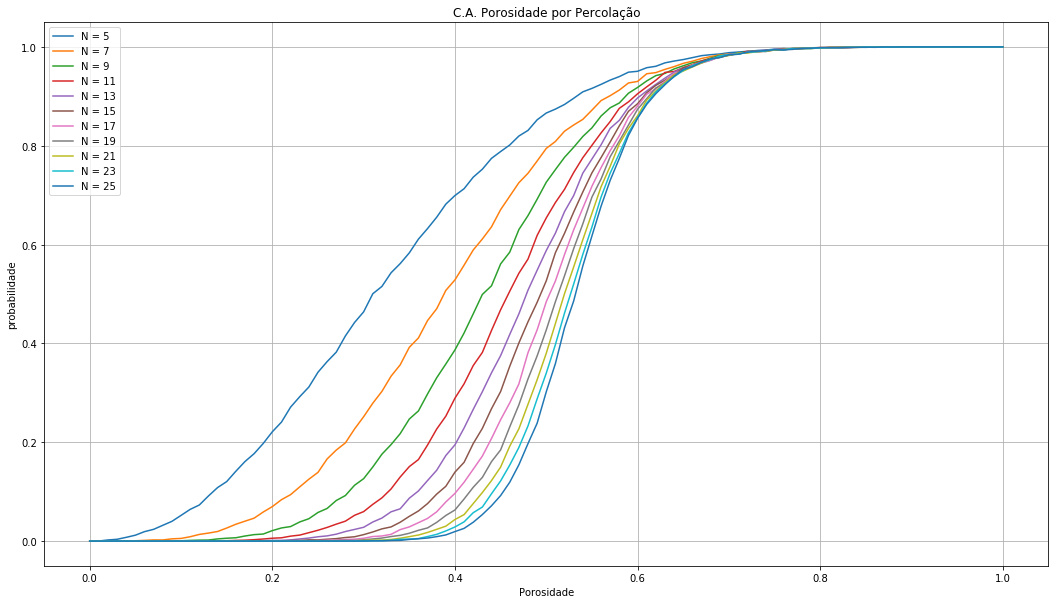

In [532]:
ini = time.time()
Gra05 = ProbabilidadeGraficoN(N=5,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra07 = ProbabilidadeGraficoN(N=7,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra09 = ProbabilidadeGraficoN(N=9,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra11 = ProbabilidadeGraficoN(N=11,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra13 = ProbabilidadeGraficoN(N=13,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra15 = ProbabilidadeGraficoN(N=15,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra17 = ProbabilidadeGraficoN(N=17,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra19 = ProbabilidadeGraficoN(N=19,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra21 = ProbabilidadeGraficoN(N=21,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra23 = ProbabilidadeGraficoN(N=23,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)
ini = time.time()
Gra25 = ProbabilidadeGraficoN(N=25,Tamanho_de_p=101, accuracy=30, repeticao=500)
fim = time.time()
print(fim-ini)

plt.figure(figsize=(18,10)) 
plt.plot(Gra05[0],Gra05[1], label='N = 5')
plt.plot(Gra07[0],Gra07[1], label='N = 7')
plt.plot(Gra09[0],Gra09[1], label='N = 9')
plt.plot(Gra11[0],Gra11[1], label='N = 11')
plt.plot(Gra13[0],Gra13[1], label='N = 13')
plt.plot(Gra15[0],Gra15[1], label='N = 15')
plt.plot(Gra17[0],Gra17[1], label='N = 17')
plt.plot(Gra19[0],Gra19[1], label='N = 19')
plt.plot(Gra21[0],Gra21[1], label='N = 21')
plt.plot(Gra23[0],Gra23[1], label='N = 23')
plt.plot(Gra25[0],Gra25[1], label='N = 25')
plt.xlabel('Porosidade')
plt.ylabel('probabilidade')
plt.title("C.A. Porosidade por Percolação")
plt.grid()
plt.legend()
plt.show()

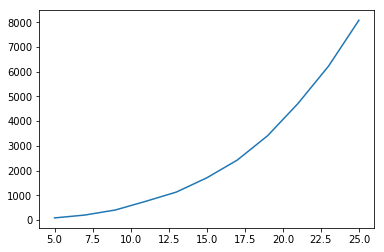

In [533]:
N = [5,7,9,11,13,15,17,19,21,23,25]
tempo = [81.8001537322998,198.56537556648254,403.2647531032562,755.327365398407,1127.5694634914398,1703.3216869831085,2420.547218322754,3409.321049928665,4716.528112649918,6223.252074480057,8085.681058883667,]
plt.plot(N,tempo, label='N = 25')

In [ ]:
plt.figure(figsize=(18,10)) 
plt.plot(Gra05[0],Gra05[1], label='N = 5')
plt.plot(Gra07[0],Gra07[1], label='N = 7')
plt.plot(Gra09[0],Gra09[1], label='N = 9')
plt.plot(Gra11[0],Gra11[1], label='N = 11')
plt.plot(Gra13[0],Gra13[1], label='N = 13')
plt.plot(Gra15[0],Gra15[1], label='N = 15')
plt.plot(Gra17[0],Gra17[1], label='N = 17')
plt.plot(Gra19[0],Gra19[1], label='N = 19')
plt.plot(Gra21[0],Gra21[1], label='N = 21')
plt.plot(Gra23[0],Gra23[1], label='N = 23')
plt.plot(Gra25[0],Gra25[1], label='N = 25')
plt.xlabel('Porosidade')
plt.ylabel('probabilidade')
plt.title("C.A. Porosidade por Percolação")
plt.grid()
plt.legend()
plt.show()

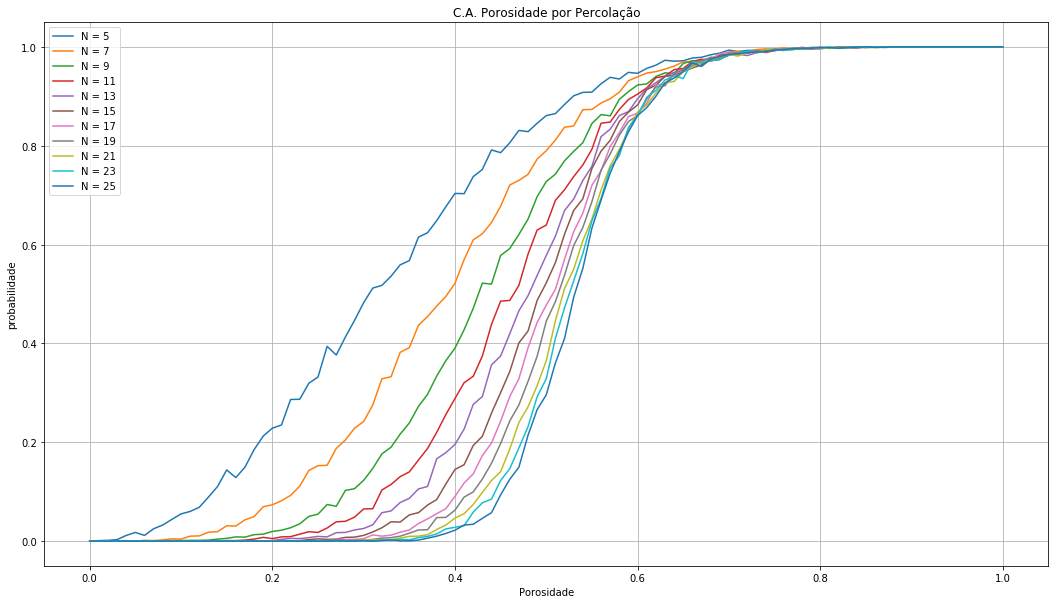

In [529]:
plt.figure(figsize=(18,10)) 
plt.plot(Gra05[0],Gra05[1], label='N = 5')
plt.plot(Gra07[0],Gra07[1], label='N = 7')
plt.plot(Gra09[0],Gra09[1], label='N = 9')
plt.plot(Gra11[0],Gra11[1], label='N = 11')
plt.plot(Gra13[0],Gra13[1], label='N = 13')
plt.plot(Gra15[0],Gra15[1], label='N = 15')
plt.plot(Gra17[0],Gra17[1], label='N = 17')
plt.plot(Gra19[0],Gra19[1], label='N = 19')
plt.plot(Gra21[0],Gra21[1], label='N = 21')
plt.plot(Gra23[0],Gra23[1], label='N = 23')
plt.plot(Gra25[0],Gra25[1], label='N = 25')
plt.xlabel('Porosidade')
plt.ylabel('probabilidade')
plt.title("C.A. Porosidade por Percolação")
plt.grid()
plt.legend()
plt.show()

In [5]:
2**64

18446744073709551616